DS ESA9 Logistic Regression (Polczynski)
------------------------------------------

Based on: https://github.com/ageron/handson-ml/blob/9798a68ded892679957b8a1303ea0b7d0f75fe92/04_training_linear_models.ipynb
from the exceptional book: _Hands on Machine Learning with Scikit-Learn and TensorFlow by Aurelien Geron, OReilly 2017, ISBN: 9781491962299_

The exercise is finding out if if 4.8, 2.5, 5.3, 2.4 is an iris-virginica.

In [16]:
%matplotlib inline
import numpy as np
from sklearn import datasets
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt

# http://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_iris.html
iris = datasets.load_iris()
list(iris.keys())

['data', 'target', 'target_names', 'DESCR', 'feature_names']

Preperation of exercise data
----------

In [30]:
# DS ESA9 Polczynski
# now define our sample we want to check..
#

# sepal Length, sepal width, petal length, petal width
checkIris = [4.8, 2.5, 5.3, 2.4] # our given example from exercise
checkPetal = [ checkIris[2], checkIris[3]] # first petal is checked
checkSepal = [ checkIris[0], checkIris[1]] # then sepal is checked

print(iris.target_names) # output names present in data for identification
print(iris.feature_names) # output features

['setosa' 'versicolor' 'virginica']
['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']


Train Petal logistic regression
---------------------------

In [10]:
X = iris["data"][:, (2, 3)]  # petal length, petal width
y = iris["target"]

softmax_reg = LogisticRegression(multi_class="multinomial",solver="lbfgs", C=10, random_state=42)
softmax_reg.fit(X, y)

LogisticRegression(C=10, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='multinomial',
          n_jobs=1, penalty='l2', random_state=42, solver='lbfgs',
          tol=0.0001, verbose=0, warm_start=False)

Result based on Petal
--------------------------------

In [57]:
# DS ESA 9
# now check petal width and length of our sample against the data
petalPredict = softmax_reg.predict([ checkPetal ])

petalProb = softmax_reg.predict_proba([checkPetal])
print("DS9: Petal based for", checkPetal,
      "results in Iris", iris.target_names[petalPredict][0],
      "with ", round(petalProb[0][petalPredict][0]*100, 5),
      "% probability!" )

# also print out probabilities
print(petalProb)

DS9: Petal based for [5.3, 2.4] results in Iris virginica with  99.87688 % probability!
[[3.14340124e-09 1.23116582e-03 9.98768831e-01]]


Petal based prediction is virginica with high confidence, lets check the sepal features next after visualizing petal.

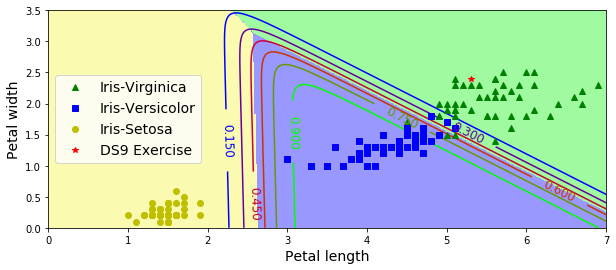

In [34]:
x0, x1 = np.meshgrid(
        np.linspace(0, 8, 500).reshape(-1, 1),
        np.linspace(0, 3.5, 200).reshape(-1, 1),
    )
X_new = np.c_[x0.ravel(), x1.ravel()]


y_proba = softmax_reg.predict_proba(X_new)
y_predict = softmax_reg.predict(X_new)

zz1 = y_proba[:, 1].reshape(x0.shape)
zz = y_predict.reshape(x0.shape)

plt.figure(figsize=(10, 4))
plt.plot(X[y==2, 0], X[y==2, 1], "g^", label="Iris-Virginica")
plt.plot(X[y==1, 0], X[y==1, 1], "bs", label="Iris-Versicolor")
plt.plot(X[y==0, 0], X[y==0, 1], "yo", label="Iris-Setosa")
plt.plot(-1, -1, "r*", label="DS9 Exercise") # DS9 label marker

from matplotlib.colors import ListedColormap
custom_cmap = ListedColormap(['#fafab0','#9898ff','#a0faa0'])

plt.contourf(x0, x1, zz, cmap=custom_cmap ) #linewidth=5
contour = plt.contour(x0, x1, zz1, cmap=plt.cm.brg)
plt.clabel(contour, inline=1, fontsize=12)
plt.xlabel("Petal length", fontsize=14)
plt.ylabel("Petal width", fontsize=14)
plt.legend(loc="center left", fontsize=14)
plt.axis([0, 7, 0, 3.5])
#save_fig("softmax_regression_contour_plot")

plt.plot(checkPetal[0], checkPetal[1], 'r*' ) # ds9 show point of exercise

plt.show()

Now do the same for the Sepal
----------

In [55]:
sep_X = iris["data"][:, (0, 1)]  # sepal length, sepal width
sep_y = iris["target"]

sep_softmax_reg = LogisticRegression(multi_class="multinomial",solver="lbfgs", C=10, random_state=42)
sep_softmax_reg.fit(sep_X, sep_y)

# check prediction result
sepalPredict = sep_softmax_reg.predict([ checkSepal ])
sepalProb = sep_softmax_reg.predict_proba([checkSepal])
print("DS9: Sepal based for", checkSepal,
      "results in Iris", iris.target_names[sepalPredict][0],
      "with ", round(sepalProb[0][sepalPredict][0]*100, 5),
      "% probability!" )

# also print out probabilities
print(sepalProb)

DS9: Sepal based for [4.8, 2.5] results in Iris versicolor with  53.61383 % probability!
[[0.43132446 0.53613828 0.03253726]]


OK interesting Sepal prediction is Versicolor with not much confidence. Lets visualize and perform a combined check of all features later,

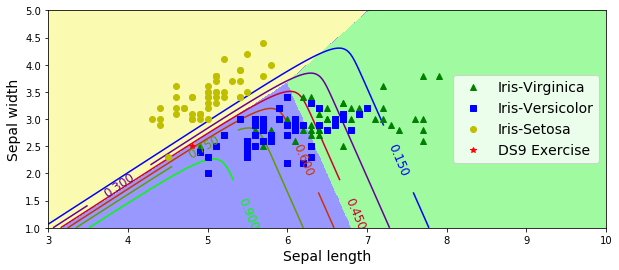

In [60]:
x0, x1 = np.meshgrid(
        np.linspace(3, 10, 500).reshape(-1, 1),
        np.linspace(1, 5, 200).reshape(-1, 1),
    )
X_new = np.c_[x0.ravel(), x1.ravel()]


y_proba = sep_softmax_reg.predict_proba(X_new)
y_predict = sep_softmax_reg.predict(X_new)

zz1 = y_proba[:, 1].reshape(x0.shape)
zz = y_predict.reshape(x0.shape)

plt.figure(figsize=(10, 4))
plt.plot(sep_X[sep_y==2, 0], sep_X[sep_y==2, 1], "g^", label="Iris-Virginica")
plt.plot(sep_X[sep_y==1, 0], sep_X[sep_y==1, 1], "bs", label="Iris-Versicolor")
plt.plot(sep_X[sep_y==0, 0], sep_X[sep_y==0, 1], "yo", label="Iris-Setosa")
plt.plot(-1, -1, "r*", label="DS9 Exercise") # DS9 label marker

from matplotlib.colors import ListedColormap
custom_cmap = ListedColormap(['#fafab0','#9898ff','#a0faa0'])

plt.contourf(x0, x1, zz, cmap=custom_cmap ) #linewidth=5
contour = plt.contour(x0, x1, zz1, cmap=plt.cm.brg)
plt.clabel(contour, inline=1, fontsize=12)
plt.xlabel("Sepal length", fontsize=14)
plt.ylabel("Sepal width", fontsize=14)
plt.legend(loc="center right", fontsize=14)
plt.axis([3, 10, 1, 5])
#save_fig("softmax_regression_contour_plot")

plt.plot(checkSepal[0], checkSepal[1], 'r*' ) # ds9 show point of exercise

plt.show()

From the visualization we can see that our exercise sample is right on the edge of being a setosa or virginica based on the sepal features. So lets perform a check based on all features now as this in conflict with the petal feature visualization.

Now Sepal and Petal are visualized and predicted, now perform check for all features at once
-----------------

In [54]:
all_X = iris["data"][:, (0, 1, 2, 3)]  # sepal + petal
all_y = iris["target"]

all_softmax_reg = LogisticRegression(multi_class="multinomial",solver="lbfgs", C=10, random_state=42)
all_softmax_reg.fit(all_X, all_y)

# check prediction result
allPredict = all_softmax_reg.predict([checkIris])
allProb = all_softmax_reg.predict_proba([checkIris])
print("DS9: Prediction based on all features for", checkIris,
      "results in Iris", iris.target_names[allPredict][0],
      "with ", round(allProb[0][allPredict][0]*100, 5),
      "% probability!" )

# also print out probabilities
print(allProb)

DS9: Prediction based on all features for [4.8, 2.5, 5.3, 2.4] results in Iris virginica with  99.9957 % probability!
[[1.69400169e-09 4.30258997e-05 9.99956972e-01]]


This doesn't contradict what we see in our visualization of petal and sepal classification so the exercise sample is a Iris Virginica!

Also we could increase the probability compared to the petal feature only approach so there is a high confidence this is the correct classification.

Visualization of 4 dimensions is difficult so the 2 graphics of sepal and petal probability classification need to be enough.